In [7]:
import numpy as np 
import pandas as pd
import pickle 
import sys
sys.path.append('/Users/tong/soundscape_IR/soundscape_viewer')

from soundscape_viewer import lts_viewer
from soundscape_viewer import gdrive_handle
from source_separation import pcnmf
from soundscape_viewer import data_organize, clustering
from source_separation import source_separation
from utility import matrix_operation
import interactive
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Loading file: Keelung_041713-050310-30min.pkl
(764, 48000)
Loading file: Keelung_060909-062522-30min.pkl
(793, 48000)
Loading file: Keelung_082912-091404-30min.pkl
(754, 48000)
(2311, 47901)


(<Figure size 2000x300 with 2 Axes>, <Axes: ylabel='Frequency'>)

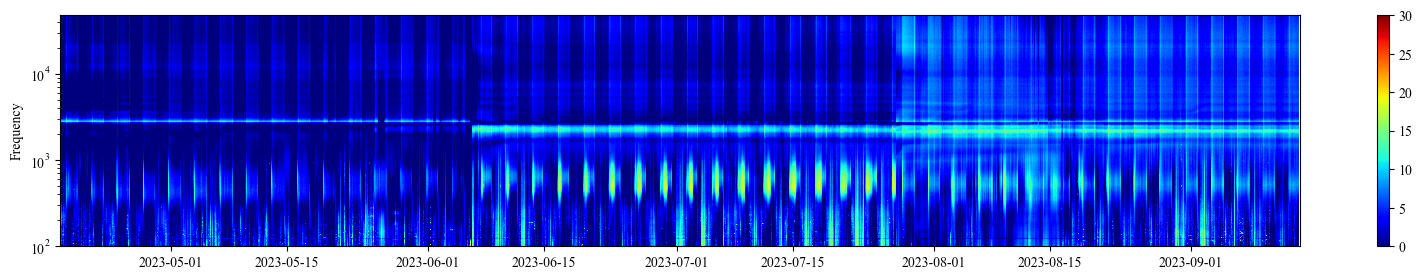

In [8]:
place = 'Keelung'

LTS=lts_viewer(path=f'./../DataBase/PAM_pickle/{place}/')
input_data, f, time = LTS.input_selection('median', prewhiten_percent=20, f_range=[100,48000])#


if time.shape[0] > input_data.shape[0]:
    time = time[1:]
    
matrix_operation().plot_lts(input_data, f, time, vmin=0, vmax=30, fig_width=20, fig_height=3, lts=False)

In [9]:
if place == 'Keelung':
    print(place)
    # file = open('../Results/soundsepration/Keelung/20231116_151017_3stages_separation/model_array.pkl' , 'rb')
    file = open('../Results/soundsepration/Keelung/20231120_151850_3stages_separation_combined/model_array.pkl' , 'rb')
    model = pickle.load(file)
    file.close()
elif place == 'Taoyuan':
    print(place)
    file = open('../Results/soundsepration/Taoyuan/20231120_112318_3stage_separation_combined/model_array.pkl' , 'rb')
    model = pickle.load(file)
    file.close()

Keelung


In [10]:
save = False

analysis_result=data_organize()

s = 1
print(f'Source: {s}; Fish ')
model['relative_level'][s-1]=model['relative_level'][s-1]-np.min(model['relative_level'][s-1])
model['relative_level'][s-1]=model['relative_level'][s-1]/np.max(model['relative_level'][s-1])
analysis_result.time_fill(time_vec=time, data=model['relative_level'][s-1], header=f'S{s}_level')
cluster_result=clustering(pca_percent=0.95, k=0.9)
cluster_result.run(input_data=model['separation'][s-1], f=f, time=time)    #, standardization='max-min'
if save:
    cluster_result.save_cluster_feature(filename=f'../Results/soundsepration/{place}_S{s}_cluster_scene_features.csv')
analysis_result.time_fill(time_vec=cluster_result.time_vec, data=cluster_result.cluster, header=f'S{s}_Cluster')

print()
print()


# s = 3

# print(f'Source: {s}')
# model['relative_level'][s-1]=model['relative_level'][s-1]-np.min(model['relative_level'][s-1])
# model['relative_level'][s-1]=model['relative_level'][s-1]/np.max(model['relative_level'][s-1])
# analysis_result.time_fill(time_vec=time, data=model['relative_level'][s-1], header=f'S{s}_level')
# cluster_result=clustering(pca_percent=0.95, k=0.9)
# cluster_result.run(input_data=model['separation'][s-1], f=f, time=time)    #, standardization='max-min'
# if save:
#     cluster_result.save_cluster_feature(filename=f'../Results/soundsepration/{place}_S{s}_cluster_scene_features.csv')
# analysis_result.time_fill(time_vec=cluster_result.time_vec, data=cluster_result.cluster, header=f'S{s}_Cluster')

if save:
    analysis_result.save_csv(f'../Results/soundsepration/{place}_S{s}_cluster.csv')

A new spreadsheet has been created.
Source: 1; Fish 
dimension reduction by PCA ......
Begining to cluster ......
k: 1 , explained variation: 0.0
k: 2 , explained variation: 0.6664938490444529
k: 3 , explained variation: 0.8056325919985554
k: 4 , explained variation: 0.8576506065793214
k: 5 , explained variation: 0.8834749953001813
k: 6 , explained variation: 0.9031959138498962
Final trial: run  6  clusters




## Plot plot_diurnal

Index(['Time', 'S1_level', 'S1_Cluster'], dtype='object')
150


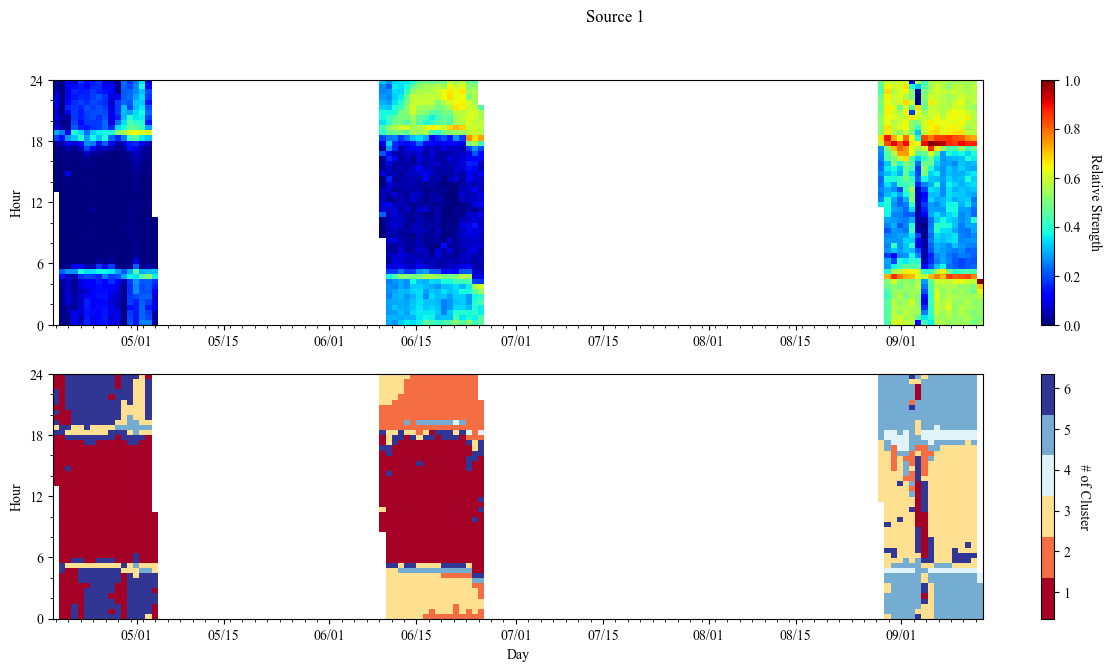

In [11]:
# Investigate the diurnal (y-axis) and seasonal change (x-axis) of source behavior
for i in [1]:# range(1, 5):
    level, cluster = analysis_result.plot_diurnal(col=i, savefig = save, file = f'../Results/soundsepration/{place}_2023_diurnal_variations', nan_value=-1,
                                                  fig_width=15, fig_height=7) 